In [142]:
import sklearn as sk
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

In [122]:
dataset=sk.datasets.fetch_covtype()

In [123]:
data = dataset.data
target = dataset.target

In [124]:
dataset.DESCR

".. _covtype_dataset:\n\nForest covertypes\n-----------------\n\nThe samples in this dataset correspond to 30Ă—30m patches of forest in the US,\ncollected for the task of predicting each patch's cover type,\ni.e. the dominant species of tree.\nThere are seven covertypes, making this a multiclass classification problem.\nEach sample has 54 features, described on the\n`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.\nSome of the features are boolean indicators,\nwhile others are discrete or continuous measurements.\n\n**Data Set Characteristics:**\n\n    =================   ============\n    Classes                        7\n    Samples total             581012\n    Dimensionality                54\n    Features                     int\n    =================   ============\n\n:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;\nit returns a dictionary-like object\nwith the feature matrix in the ``data`` member\nand the target values in ``tar

In [125]:
print(data)

[[2.596e+03 5.100e+01 3.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.590e+03 5.600e+01 2.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.804e+03 1.390e+02 9.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [2.386e+03 1.590e+02 1.700e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.384e+03 1.700e+02 1.500e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.383e+03 1.650e+02 1.300e+01 ... 0.000e+00 0.000e+00 0.000e+00]]


In [126]:
print(target)

[5 5 2 ... 3 3 3]


In [127]:
data.shape
#7 klas (1-7), 54 cechy, >581 tys. rekordów
#https://archive.ics.uci.edu/ml/datasets/Covertype - dokładniejszy opis

(581012, 54)

In [128]:
data1=np.append(data,target.reshape(len(target),1), axis=1)
data1.shape
data1[0]

array([2.596e+03, 5.100e+01, 3.000e+00, 2.580e+02, 0.000e+00, 5.100e+02,
       2.210e+02, 2.320e+02, 1.480e+02, 6.279e+03, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       5.000e+00])

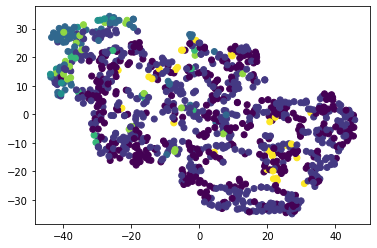

In [129]:
#TSNE
from sklearn.manifold import TSNE
import random

random_id = np.array(random.sample(range(len(data)),1000))


model = TSNE(learning_rate=100)
transformed = model.fit_transform(data[random_id])

xs = transformed[:,0]
ys = transformed[:,1]

plt.figure()
plt.scatter(xs,ys,c=target[random_id])
plt.show()

In [207]:
#Moja implementacja klasyfikatora kNN
random_id2 = np.array(random.sample(range(len(data)),500))
from sklearn.model_selection import train_test_split
#train, test = train_test_split(data[random_id].copy(),test_size=0.2, random_state=222)
train, test = train_test_split(data1[random_id2].copy(),test_size=0.2,random_state=222)

In [208]:
train.shape


(400, 55)

In [209]:
test.shape

(100, 55)

In [210]:
#Macierz na odległości poszczególnych punktów od szukanego
distance=np.zeros_like(train[:,-1])

In [211]:
def CountDistance(n):
    sum_sq=np.arange(54)
    for i in range(len(train)):
        for j in range(54):
            sum_sq[j]=((test[n,j]-train[i,j])**2)
        distance[i]=math.pow(sum(sum_sq),1.0/54)
    return distance

In [212]:
def sort(array): 
    for n in range(0,len(array)-1): 
        
        # zmienna, przechowywująca informację czy dokonała się zamiana miejscami - ocena czy tablica jest posortowana.
        change = False 
        
        for i in range(0,len(array)-1): 
            
            # Sprawdzenie czy następna liczba na liście jest mniejsza. Jeżeli tak - zamiana ich kolejności.
            if array[i] > array[i+1]: 
                array[i], array[i+1] = array[i+1], array[i] 
                change = True 
            
        # Sprawdzame czy dokonana została zamiana miejscami chociaż jednego elementu
        if change == False: 
            return array

In [213]:
okk=False
while okk==False:
     
    try:
        k=input("Wpisz parametr k klasyfikatora: (proponowana wartość: 3)")
        k=int(k)
        okk=True
        
        if k>=len(train):
            raise Exception
        elif k<=0:
            raise Exception
                
    except ValueError:
        print('Spróbuj ponownie: ')
        okk=False
    except Exception:
        print ('Spróbuj ponownie: ')
        okk=False

Wpisz parametr k klasyfikatora: (proponowana wartość: 3)3


In [214]:
#Klasyfikator - liczy całość dla jednego wiersza tabeli test
def CountAllTest(n,k):
    row=CountDistance(n)
    
    #Powiązanie odległości (macierz row) z klasami z macierzy target
    rowA=np.append(train[:,54].reshape(len(train),1),row.reshape(len(row),1),axis=1)
    #rowA=np.append(target.reshape(len(target),1),row.reshape(len(row),1),axis=1)
    sort(row)
      
    knn=np.zeros(k)
    for i in range (len(knn)):
        knn[i]=row[i]
    
    #macierz klas - przechowuje klasy najbliższych punktów
    classes=np.zeros(k)
    
    #Zamiana macierzy klas i odległości na DataFrame
    DFrowA=pd.DataFrame(rowA)
    
    #Wypełnienie macierzy danymi
    for i in range(k):
        classes[i]=DFrowA[0][DFrowA[1]==knn[i]]
        
    #Obliczenie, punktów której klasy jest więcej
    a=0
    b=0
    c=0
    d=0
    e=0
    f=0
    g=0
    
    for i in range(len(classes)):
        if classes[i]==1:
            a+=1
        elif classes[i]==2:
            b+=1
        elif classes[i]==3:
            c+=1
        elif classes[i]==4:
            d+=1
        elif classes[i]==5:
            e+=1
        elif classes[i]==6:
            f+=1
        elif classes[i]==7:
            g+=1
            
    #Wyświetlenie wyniku
    M = max([a,b,c,d,e,f,g])
    if M == a:
        SearchedClass = 1
    elif M == b:
        SearchedClass = 2
    elif M == c:
        SearchedClass = 3
    elif M == d:
        SearchedClass = 4
    elif M == e:
        SearchedClass = 5
    elif M == f:
        SearchedClass = 6
    elif M == g:
        SearchedClass = 7
    
    return SearchedClass

In [215]:
#Przykład dla próbki 0 i k=3
CountAllTest(0,3)

1

In [216]:
test[0]

array([2.945e+03, 3.540e+02, 2.000e+00, 9.000e+01, 0.000e+00, 5.490e+03,
       2.150e+02, 2.350e+02, 1.570e+02, 2.160e+03, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00])

In [217]:
for i in range(5,10):
    print (i+1,"element należy do klasy: ", CountAllTest(i,k))

6 element należy do klasy:  1
7 element należy do klasy:  2
8 element należy do klasy:  1
9 element należy do klasy:  1
10 element należy do klasy:  1


In [218]:
#Sprawdzenie:
test[5:10,54]

array([1., 2., 2., 1., 2.])

In [219]:
predictedkNN = np.arange(len(test))
for i in range(len(test)):
    predictedkNN[i]=CountAllTest(i,3)

In [220]:
#Użycie funkcji KNeighborsClassifier ze Scikit-learn:
from sklearn.neighbors import KNeighborsClassifier

train2, test2, train_label, test_label = train_test_split(data1[random_id2].copy(),target[random_id2].copy(),test_size=0.2,random_state=222)
classifier = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None) 
classifier.fit(train2,train_label)

predicted = classifier.predict(test2)

print('Zaproponowane przez klasyfikator: ', predicted[:10])
print('Poprawne: ', test_label[:10])

Zaproponowane przez klasyfikator:  [1 3 1 1 2 1 2 1 1 1]
Poprawne:  [1 3 2 1 2 1 2 2 1 2]


In [221]:
#Analiza i porównanie wyników klasyfikatorów przy pomocy confusion matrix, wykresu k vs accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print (accuracy_score(test_label, predicted))
print (confusion_matrix(test_label, predicted))

0.6
[[28 12  0  0  0  1]
 [17 28  0  0  1  0]
 [ 1  2  3  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1  1  0  1  0]
 [ 3  0  0  0  0  0]]


In [222]:
#Dla mojej implementacji kNN:
print (accuracy_score(test_label, predictedkNN))
print (confusion_matrix(test_label, predictedkNN))

0.6
[[28 12  0  0  0  1]
 [17 28  0  0  1  0]
 [ 1  2  3  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1  1  0  1  0]
 [ 3  0  0  0  0  0]]


In [287]:
#Moja implementacja klasyfikatora NM

def MeanForClass(n):
    mean=np.arange(54)
    std=np.arange(54)
    #n to klasa
    
    for i in range(54):
        mean[i]=np.mean(data1[(np.where(data1[:,54]==n)),i])
        std[i]=np.std(data1[(np.where(data1[:,54]==n)),i])
    return mean, std


In [288]:
#Średnie
mean1, std1=MeanForClass(1)
mean2, std2=MeanForClass(2)
mean3, std3=MeanForClass(3)
mean4, std4=MeanForClass(4)
mean5, std5=MeanForClass(5)
mean6, std6=MeanForClass(6)
mean7, std7=MeanForClass(7)
Mean=([mean1,mean2,mean3,mean4,mean5,mean6,mean7])
Std=([std1,std2,std3,std4,std5,std6,std7])

In [289]:
print (mean1)

[3128  156   13  270   42 2614  211  223  143 2009    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


In [372]:
print (std7)
#ponieważ część wartości std = 0 nie można policzyć odległości Mahalanobisa

[ 106  110    7  295   79 1200   23   19   38 1087    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


In [464]:
#Macierz kwadratów
def SqrtArr(n,row):
    SqrtA=np.arange(54)
    for i in SqrtA:
        SqrtA[i]=(Mean[n][i]-test[row][i])**2
    return SqrtA


In [475]:
def klasyfikatorNM(n):
    for i in range(7):
        distances[i]=math.pow(np.sum(SqrtArr(i,n)),1.0/54)
    Classes=np.arange(1,8)
    DistCls=np.append(Classes.reshape(7,1),distances.reshape(7,1),axis=1)   
    kNM=DistCls[DistCls[:,1]==min(DistCls[:,1])][0][0]       
    return kNM

In [482]:
klasyfikatorNM(1)

3.0

In [443]:
test[:,54]

array([1., 3., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 5., 2., 3., 2., 2.,
       2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 3., 2., 7., 1., 2.,
       1., 6., 2., 2., 2., 6., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2.,
       2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2.,
       2., 1., 1., 2., 3., 1., 7., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1.,
       1., 1., 3., 1., 1., 2., 3., 2., 1., 2., 6., 7., 2., 2., 1.])

In [480]:
#Macierz predykcji
preNM=np.arange(len(test))

for i in preNM:
    preNM[i]=klasyfikatorNM(i)
print(preNM)

[7 3 2 5 7 2 3 7 5 7 7 7 3 3 6 1 7 2 3 2 7 7 5 5 7 7 5 7 7 6 2 7 7 5 7 3 2
 1 2 6 5 1 5 2 2 7 5 4 7 5 2 2 2 2 1 2 7 2 6 7 5 3 2 7 5 7 7 6 7 7 7 2 4 2
 7 5 1 4 1 2 7 7 5 7 7 7 7 3 2 2 7 6 5 7 2 4 5 5 3 2]


In [ ]:
#Porównanie accuracy NM z obiema wersjami kNN

In [483]:
print ('Mój klasyfikator kNN',accuracy_score(test_label, predictedkNN))
print ('Klasyfikator kNN z Scikit-learn',accuracy_score(test_label, predicted))
print ('Mój klasyfikator NM',accuracy_score(test_label, preNM))

Mój klasyfikator kNN 0.6
Klasyfikator kNN z Scikit-learn 0.6
Mój klasyfikator NM 0.22
